In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv("iot_dataset.csv")
data.head(5)

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
0,1,1,32,0,77,1
1,2,2,32,0,77,1
2,3,1,32,16,77,1
3,4,2,32,0,77,1
4,5,1,32,18,77,1


In [79]:
data.shape

(150, 6)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sl.No             150 non-null    int64
 1   Patient ID        150 non-null    int64
 2   Temperature Data  150 non-null    int64
 3   ECG Data          150 non-null    int64
 4   Pressure Data     150 non-null    int64
 5   Target            150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [81]:
data.isnull().sum()

Sl.No               0
Patient ID          0
Temperature Data    0
ECG Data            0
Pressure Data       0
Target              0
dtype: int64

In [82]:
data.drop(['Sl.No', 'Patient ID'], axis=1, inplace=True)

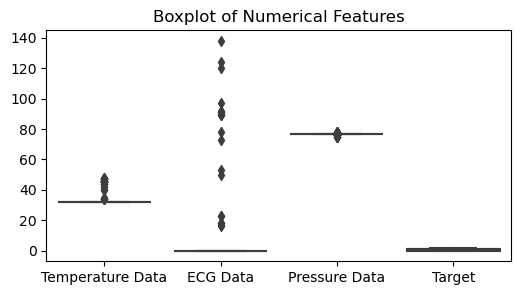

In [87]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data)
plt.title('Boxplot of Numerical Features')
plt.show()

In [88]:
X = data.drop('Target', axis=1)
y = data['Target']

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
data

,Temperature Data,ECG Data,Pressure Data,Target
0,32,0,77,1
1,32,0,77,1
2,32,16,77,1
3,32,0,77,1
4,32,18,77,1
...,...,...,...,...
145,32,0,77,2
146,32,0,77,2
147,32,0,77,1
148,32,0,77,2


In [101]:
# Create PolynomialFeatures transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the features to polynomial features
X_poly = poly_features.fit_transform(X_scaled)

# Convert the transformed features back to a DataFrame (optional)
X_poly_df = pd.DataFrame(X_poly)

# Display the first few rows of the transformed DataFrame
print(X_poly_df.head())

          0         1         2         3         4         5         6  \
0 -0.468357 -0.337190  0.208676  0.219358  0.157925 -0.097735  0.113697   
1 -0.468357 -0.337190  0.208676  0.219358  0.157925 -0.097735  0.113697   
2 -0.468357  0.245009  0.208676  0.219358 -0.114752 -0.097735  0.060029   
3 -0.468357 -0.337190  0.208676  0.219358  0.157925 -0.097735  0.113697   
4 -0.468357  0.317783  0.208676  0.219358 -0.148836 -0.097735  0.100986   

          7         8  
0 -0.070363  0.043545  
1 -0.070363  0.043545  
2  0.051127  0.043545  
3 -0.070363  0.043545  
4  0.066314  0.043545  


In [102]:
## classification 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {type(model).__name__}: {accuracy:.2f}")

print("Evaluation Results:")
evaluate_model(logistic_regression, X_test, y_test)
evaluate_model(decision_tree, X_test, y_test)
evaluate_model(random_forest, X_test, y_test)

Evaluation Results:
Accuracy of LogisticRegression: 0.30
Accuracy of DecisionTreeClassifier: 0.47
Accuracy of RandomForestClassifier: 0.53


In [103]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator
print("Best parameters:", best_params)
print("Best estimator accuracy:", best_estimator.score(X_test, y_test))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best estimator accuracy: 0.5333333333333333


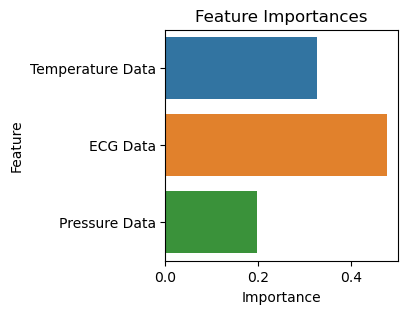

In [106]:
# Fit the best estimator on the entire training dataset
best_estimator.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_estimator.feature_importances_

# Visualize feature importances
plt.figure(figsize=(3,3))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()